In [43]:
import torch
import torch.nn as nn
import typing
import csv
from sklearn import preprocessing
import numpy as np
from matplotlib import pyplot as plt

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
class Net(nn.Module):
    def __init__(self, numin, numout):
        super(Net, self).__init__()
        fc = []
        fc.append(nn.Linear(numin, numout))
        for i in range(20):
            fc.append(nn.Linear(numout, numout))
        self.fc = nn.ModuleList(fc)
        #self.relu = nn.ReLU()
        self.sig = nn.Sigmoid()

    def forward(self, x):
        for fc in self.fc:
            x = fc(x)
            #x = self.relu(x)
            x = self.sig(x) 
        return x

In [61]:
try:
    with open('input.csv', 'r', encoding='shift-jis') as f:
        reader = csv.reader(f)
        next(reader)  # skip the header
        inputs = []
        for row in reader:
            v = []
            for i in range(1, len(row)):
                v.append(float(row[i]))
            inputs.append(v)
  
        train_input = []
        for i in range(len(inputs[0])-50):
          each_data=[]
          for k in range(50):
            each_data.append(inputs[k][i])
          train_input.append(each_data)
        print(len(train_input), len(train_input[0]))

        test_input = []
        for i in range(len(inputs[0])-50, len(inputs[0])):
          each_data = []
          for k in range(50):
            each_data.append(inputs[k][i])
          test_input.append(each_data)
        print(len(test_input), len(test_input[0]))

except FileNotFoundError as e:
    print(e)

350 50
50 50


In [62]:
try:
    with open('target.csv', 'r',
              encoding='shift-jis') as f:
        reader = csv.reader(f)
        next(reader)  # skip the header
        targets = []
        for row in reader:
            v = []
            for i in range(1, len(row)):
                v.append(float(row[i]))
            targets.append(v)
        
        train_target = []
        for i in range(350):
          each_data=[]
          for k in range(50):
            each_data.append(targets[k][i])
          train_target.append(each_data)
        print(len(train_target), len(train_target[0]))

        test_target = []
        for i in range(350, 400):
          each_data = []
          for k in range(50):
            each_data.append(targets[k][i])
          test_target.append(each_data)
        print(len(test_target), len(test_target[0]))
except FileNotFoundError as e:
    print(e)

350 50
50 50


In [63]:
train_input = preprocessing.normalize(np.array(train_input)).astype(float)
train_target = preprocessing.normalize(np.array(train_target)).astype(float)

test_input = preprocessing.normalize(np.array(test_input)).astype(float)
test_target = preprocessing.normalize(np.array(test_target)).astype(float)

In [65]:
numInput = 50
numOutput = 50
model = Net(numInput, numOutput)

trainInputs = torch.tensor(train_input)
trainTargets = torch.tensor(train_target)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_list = []

for epoch in range(100):
    optimizer.zero_grad()

    trainOutputs = model(trainInputs.float())
    loss = criterion(trainOutputs, trainTargets.float())
    loss_list.append(loss)
    print("The loss for epoch "+str(epoch+1)+": ",loss.item())

    loss.backward()
    optimizer.step()

The loss for epoch 1:  0.2427482157945633
The loss for epoch 2:  0.17684519290924072
The loss for epoch 3:  0.12230417132377625
The loss for epoch 4:  0.07860908657312393
The loss for epoch 5:  0.046516090631484985
The loss for epoch 6:  0.025612695142626762
The loss for epoch 7:  0.013590361922979355
The loss for epoch 8:  0.007324795238673687
The loss for epoch 9:  0.004232653882354498
The loss for epoch 10:  0.0027234877925366163
The loss for epoch 11:  0.0019728976767510176
The loss for epoch 12:  0.0015866004396229982
The loss for epoch 13:  0.0013797247083857656
The loss for epoch 14:  0.0012643940281122923
The loss for epoch 15:  0.0011975928209722042
The loss for epoch 16:  0.0011575089301913977
The loss for epoch 17:  0.001132671139203012
The loss for epoch 18:  0.0011168277123942971
The loss for epoch 19:  0.0011064549908041954
The loss for epoch 20:  0.0010995041811838746
The loss for epoch 21:  0.0010947487317025661
The loss for epoch 22:  0.001091433921828866
The loss for 

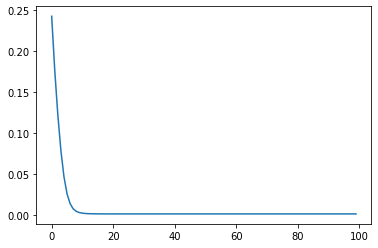

In [67]:
losses = []
for loss in loss_list:
  losses.append(loss.item())
plt.plot(range(100), losses)

In [21]:
path = "/content/drive/MyDrive/Machine_Learning_sample/NetModel2.pth" 
torch.save(model.state_dict(), path) 

In [ ]:
input_size = 1546
output_size = 1546
model = Net(input_size, output_size) 
path = "/content/drive/MyDrive/Machine_Learning_sample/NetModel2.pth" 
model.load_state_dict(torch.load(path)) 
test_input = torch.tensor(test_input)
test_target = torch.tensor(test_target)

accuracy = 0
for i in range(len(test_input)):
  predict = model(test_input[i].float())
  difference = 0
  target = test_target[i].float()
  for k in range(len(predict)):
    difference += abs(predict[k] - target[k])
  print(difference)
 
